# Data Anlysis on Valorant Stats

Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.reset_option('display.max_rows')

 Reading in all the files from Ironic Ninja and creating a dataset

I ended up creating 3 datasets

In [2]:
# abilites: agent's ability usage
tiers = []
df = pd.read_csv("valorant-stats-master/abilities_data/all/agents_competitive_tier=3.csv")
df["tier"] = 3
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/abilities_data/all/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/abilities_data/all/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    count += 1

for dataframe in tiers:
    df = pd.concat([df, dataframe])

tiers.clear()
df


,Unnamed: 0,Agent Name,Ability 1,Ability 2,Ability 3,Ultimate,tier
0,0,Sage,8.1,8.6,10.0,1.5,3
1,1,Raze,8.4,12.8,10.6,2.0,3
2,2,Jett,7.3,9.6,11.6,1.7,3
3,3,Reyna,6.5,3.9,12.5,1.3,3
4,4,Viper,7.0,13.7,10.5,1.4,3
...,...,...,...,...,...,...,...
8,8,Omen,10.5,30.0,3.0,2.5,20
9,9,Skye,13.5,34.0,2.0,4.5,20
10,10,Astra,8.0,31.5,14.0,1.0,20
11,11,Phoenix,13.5,15.0,4.5,3.5,20


adding maps

In [3]:
# map data
tiers = []
count = 0

for i in range(3, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/map_data/maps_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/map_data/maps_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    count += 1

for dataframe in tiers:
     df = pd.concat([df,dataframe])

tiers.clear()
df


,Unnamed: 0,Agent Name,Ability 1,Ability 2,Ability 3,Ultimate,tier,Map Name,Play Rate,Atk Win,Def Win,Num Matches
0,0,Sage,8.1,8.6,10.0,1.5,3,NaN,NaN,NaN,NaN,NaN
1,1,Raze,8.4,12.8,10.6,2.0,3,NaN,NaN,NaN,NaN,NaN
2,2,Jett,7.3,9.6,11.6,1.7,3,NaN,NaN,NaN,NaN,NaN
3,3,Reyna,6.5,3.9,12.5,1.3,3,NaN,NaN,NaN,NaN,NaN
4,4,Viper,7.0,13.7,10.5,1.4,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,NaN,NaN,NaN,NaN,NaN,20,Breeze,14.6%,51.2%,48.8%,306
2,2,NaN,NaN,NaN,NaN,NaN,20,Haven,14.6%,46.8%,53.2%,306
3,3,NaN,NaN,NaN,NaN,NaN,20,Ascent,22%,42.6%,57.4%,459
4,4,NaN,NaN,NaN,NaN,NaN,20,Split,24.4%,41.1%,58.9%,510


Adding agents and weapons based on different map stats

In [4]:
# Agents are the characters
agents = pd.read_csv("valorant-stats-master/agents_data/ascent/agents_competitive_tier=3.csv")
tiers = []
agents["tier"] = 3
agents["Map Name"] = "Ascent"
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/ascent/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Ascent"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/ascent/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Ascent"
    count += 1

for dataframe in tiers:
    agents = pd.concat([agents, dataframe])

tiers.clear()
agents

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50%,19.2%,146,10.3%,"1,224",3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9%,14.4%,244,11.7%,918,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7%,9.6%,274,14.3%,612,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5%,8.8%,185,15.3%,561,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40%,8%,182,9.3%,510,3,Ascent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,Sage,1.17,14.0,12.0,4.3,66.7%,18.8%,209,14.3%,153,20,Ascent
2,2,Sova,0.84,13.5,16.0,4.5,50%,12.5%,225,22.2%,102,20,Ascent
3,3,Killjoy,0.92,12.0,13.0,1.0,50%,12.5%,176,4.2%,102,20,Ascent
4,4,Reyna,1.62,21.0,13.0,4.0,50%,12.5%,335,11.9%,102,20,Ascent


In [5]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/bind/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Bind"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/bind/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Bind"
    count += 1

for dataframe in tiers:
    agents = pd.concat([agents, dataframe])

agents

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50%,19.2%,146,10.3%,"1,224",3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9%,14.4%,244,11.7%,918,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7%,9.6%,274,14.3%,612,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5%,8.8%,185,15.3%,561,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40%,8%,182,9.3%,510,3,Ascent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,Sova,0.27,4.0,15.0,7.0,0%,20%,94,0%,51,20,Bind
1,1,Phoenix,1.33,16.0,12.0,2.0,100%,20%,209,25%,51,20,Bind
2,2,Viper,2.09,23.0,11.0,3.0,100%,20%,260,8.7%,51,20,Bind
3,3,Reyna,0.73,11.0,15.0,3.0,0%,20%,193,18.2%,51,20,Bind


In [6]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/breeze/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Breeze"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/breeze/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Breeze"
    count += 1

for dataframe in tiers:
    agents = pd.concat([agents, dataframe])

agents

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50%,19.2%,146,10.3%,"1,224",3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9%,14.4%,244,11.7%,918,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7%,9.6%,274,14.3%,612,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5%,8.8%,185,15.3%,561,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40%,8%,182,9.3%,510,3,Ascent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,1,Jett,0.96,13.5,14.0,5.0,100%,22.2%,196,25.9%,102,20,Breeze
2,2,Reyna,1.00,15.0,15.0,4.0,0%,11.1%,257,6.7%,51,20,Breeze
3,3,Cypher,1.67,15.0,9.0,3.0,100%,11.1%,220,13.3%,51,20,Breeze
4,4,Skye,1.00,16.0,16.0,2.0,100%,11.1%,173,12.5%,51,20,Breeze


In [7]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/haven/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Haven"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/haven/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Haven"
    count += 1

for dataframe in tiers:
    agents = pd.concat([agents, dataframe])

agents

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50%,19.2%,146,10.3%,"1,224",3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9%,14.4%,244,11.7%,918,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7%,9.6%,274,14.3%,612,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5%,8.8%,185,15.3%,561,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40%,8%,182,9.3%,510,3,Ascent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,9,Killjoy,1.00,13.5,13.5,3.5,0%,2.9%,217,3.7%,102,19,Haven
0,0,Reyna,1.48,19.3,13.0,3.3,50%,50%,301,13%,204,20,Haven
1,1,Jett,0.82,13.5,16.5,5.5,50%,25%,193,29.6%,102,20,Haven
2,2,Phoenix,0.76,16.0,21.0,5.0,0%,12.5%,218,25%,51,20,Haven


In [8]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/split/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Split"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/split/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Split"
    count += 1

for dataframe in tiers:
    agents = pd.concat([agents, dataframe])

agents

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50%,19.2%,146,10.3%,"1,224",3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9%,14.4%,244,11.7%,918,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7%,9.6%,274,14.3%,612,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5%,8.8%,185,15.3%,561,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40%,8%,182,9.3%,510,3,Ascent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,Skye,1.25,15.0,12.0,3.0,100%,6.7%,218,6.7%,51,20,Split
6,6,Killjoy,2.0,16.0,8.0,2.0,100%,6.7%,222,6.3%,51,20,Split
7,7,Astra,0.81,13.0,16.0,5.0,0%,6.7%,188,0%,51,20,Split
8,8,Reyna,0.8,12.0,15.0,4.0,0%,6.7%,264,33.3%,51,20,Split


In [9]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/all/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "All"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/agents_data/all/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "All"
    count += 1

for dataframe in tiers:
    agents = pd.concat([agents, dataframe])

agents

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50%,19.2%,146,10.3%,"1,224",3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9%,14.4%,244,11.7%,918,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7%,9.6%,274,14.3%,612,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5%,8.8%,185,15.3%,561,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40%,8%,182,9.3%,510,3,Ascent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,8,Omen,0.79,11.5,14.5,4.5,0%,3.2%,171,8.7%,102,20,All
9,9,Skye,1.11,15.5,14.0,2.5,100%,3.2%,193,9.7%,102,20,All
10,10,Astra,0.97,15.0,15.5,4.0,0%,3.2%,204,0%,102,20,All
11,11,Phoenix,0.97,16.0,16.5,3.5,50%,3.2%,214,25%,102,20,All


In [10]:
agents['Map Name'].value_counts()

Ascent    258
All       253
Bind      243
Haven     238
Breeze    233
Split     215
Name: Map Name, dtype: int64

Icebox did not make it in because Icebox was not there

Doing the same thing but for weapons

In [11]:
# Agents are the characters
weapons = pd.read_csv("valorant-stats-master/weapons_data/ascent/agents_competitive_tier=3.csv")
tiers = []
weapons["tier"] = 3
weapons["Map Name"] = "Ascent"
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/ascent/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Ascent"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/ascent/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Ascent"
    count += 1

for dataframe in tiers:
    weapons = pd.concat([weapons, dataframe])

tiers.clear()
weapons

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,5.7,11.3%,75.8%,12.9%,120,3,Ascent
1,1,Phantom,4.9,11%,72%,17%,109,3,Ascent
2,2,Guardian,4.7,14.6%,69.7%,15.7%,130,3,Ascent
3,3,Spectre,4.4,10.8%,74.1%,15.2%,92,3,Ascent
4,4,Ares,4.0,6%,67.6%,26.4%,89,3,Ascent
...,...,...,...,...,...,...,...,...,...
11,11,Marshal,1.0,100%,0%,0%,202,20,Ascent
12,12,Bulldog,1.0,33.3%,66.7%,0%,110,20,Ascent
13,13,Ares,1.0,0%,100%,0%,85,20,Ascent
14,14,Stinger,0.7,26.3%,57.9%,15.8%,98,20,Ascent


In [12]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/bind/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Bind"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/bind/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Bind"
    count += 1

for dataframe in tiers:
    weapons = pd.concat([weapons, dataframe])

weapons

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,5.7,11.3%,75.8%,12.9%,120,3,Ascent
1,1,Phantom,4.9,11%,72%,17%,109,3,Ascent
2,2,Guardian,4.7,14.6%,69.7%,15.7%,130,3,Ascent
3,3,Spectre,4.4,10.8%,74.1%,15.2%,92,3,Ascent
4,4,Ares,4.0,6%,67.6%,26.4%,89,3,Ascent
...,...,...,...,...,...,...,...,...,...
2,2,Spectre,2.3,31.8%,63.6%,4.5%,104,20,Bind
3,3,Ghost,1.8,11.5%,84.6%,3.8%,87,20,Bind
4,4,Phantom,1.0,26.3%,68.4%,5.3%,115,20,Bind
5,5,Classic,0.0,0%,100%,0%,26,20,Bind


In [13]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/breeze/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Breeze"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/breeze/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Breeze"
    count += 1

for dataframe in tiers:
    weapons = pd.concat([weapons, dataframe])

weapons

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,5.7,11.3%,75.8%,12.9%,120,3,Ascent
1,1,Phantom,4.9,11%,72%,17%,109,3,Ascent
2,2,Guardian,4.7,14.6%,69.7%,15.7%,130,3,Ascent
3,3,Spectre,4.4,10.8%,74.1%,15.2%,92,3,Ascent
4,4,Ares,4.0,6%,67.6%,26.4%,89,3,Ascent
...,...,...,...,...,...,...,...,...,...
5,5,Sheriff,1.0,39.1%,60.9%,0%,115,20,Breeze
6,6,Marshal,1.0,25%,75%,0%,119,20,Breeze
7,7,Classic,0.8,24%,68%,8%,63,20,Breeze
8,8,Bulldog,0.5,11.1%,88.9%,0%,71,20,Breeze


In [14]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/haven/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Haven"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/haven/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Haven"
    count += 1

for dataframe in tiers:
    weapons = pd.concat([weapons, dataframe])

weapons

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,5.7,11.3%,75.8%,12.9%,120,3,Ascent
1,1,Phantom,4.9,11%,72%,17%,109,3,Ascent
2,2,Guardian,4.7,14.6%,69.7%,15.7%,130,3,Ascent
3,3,Spectre,4.4,10.8%,74.1%,15.2%,92,3,Ascent
4,4,Ares,4.0,6%,67.6%,26.4%,89,3,Ascent
...,...,...,...,...,...,...,...,...,...
6,6,Judge,1.5,21.1%,63.2%,15.8%,83,20,Haven
7,7,Frenzy,1.3,16.1%,77.4%,6.5%,104,20,Haven
8,8,Stinger,1.0,40%,40%,20%,104,20,Haven
9,9,Ghost,0.6,14.3%,85.7%,0%,73,20,Haven


In [15]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/split/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Split"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/split/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "Split"
    count += 1

for dataframe in tiers:
    weapons = pd.concat([weapons, dataframe])

weapons

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,5.7,11.3%,75.8%,12.9%,120,3,Ascent
1,1,Phantom,4.9,11%,72%,17%,109,3,Ascent
2,2,Guardian,4.7,14.6%,69.7%,15.7%,130,3,Ascent
3,3,Spectre,4.4,10.8%,74.1%,15.2%,92,3,Ascent
4,4,Ares,4.0,6%,67.6%,26.4%,89,3,Ascent
...,...,...,...,...,...,...,...,...,...
8,8,Ghost,1.0,29.4%,70.6%,0%,79,20,Split
9,9,Ares,1.0,25%,75%,0%,162,20,Split
10,10,Marshal,1.0,0%,100%,0%,86,20,Split
11,11,Judge,1.0,0%,69.2%,30.8%,99,20,Split


In [16]:
tiers = []
count = 0

for i in range(4, 10):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/all/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "All"
    count += 1

for i in range(10, 21):
    tiers.append(pd.read_csv(f"valorant-stats-master/weapons_data/all/agents_competitive_tier={i}.csv"))
    tiers[count]["tier"] = i
    tiers[count]["Map Name"] = "All"
    count += 1

for dataframe in tiers:
    weapons = pd.concat([weapons, dataframe])

weapons

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,5.7,11.3%,75.8%,12.9%,120,3,Ascent
1,1,Phantom,4.9,11%,72%,17%,109,3,Ascent
2,2,Guardian,4.7,14.6%,69.7%,15.7%,130,3,Ascent
3,3,Spectre,4.4,10.8%,74.1%,15.2%,92,3,Ascent
4,4,Ares,4.0,6%,67.6%,26.4%,89,3,Ascent
...,...,...,...,...,...,...,...,...,...
11,11,Bulldog,1.1,13.6%,81.8%,4.5%,103,20,All
12,12,Marshal,1.0,20%,80%,0%,129,20,All
13,13,Ares,1.0,4.3%,95.7%,0%,98,20,All
14,14,Stinger,0.8,29.2%,54.2%,16.7%,99,20,All


In [17]:
weapons['Map Name'].value_counts()

Ascent    305
All       288
Split     285
Haven     282
Bind      278
Breeze    277
Name: Map Name, dtype: int64

### EDA

In [18]:
df.head()

,Unnamed: 0,Agent Name,Ability 1,Ability 2,Ability 3,Ultimate,tier,Map Name,Play Rate,Atk Win,Def Win,Num Matches
0,0,Sage,8.1,8.6,10.0,1.5,3,NaN,NaN,NaN,NaN,NaN
1,1,Raze,8.4,12.8,10.6,2.0,3,NaN,NaN,NaN,NaN,NaN
2,2,Jett,7.3,9.6,11.6,1.7,3,NaN,NaN,NaN,NaN,NaN
3,3,Reyna,6.5,3.9,12.5,1.3,3,NaN,NaN,NaN,NaN,NaN
4,4,Viper,7.0,13.7,10.5,1.4,3,NaN,NaN,NaN,NaN,NaN


In [19]:
df.tail()

,Unnamed: 0,Agent Name,Ability 1,Ability 2,Ability 3,Ultimate,tier,Map Name,Play Rate,Atk Win,Def Win,Num Matches
1,1,NaN,NaN,NaN,NaN,NaN,20,Breeze,14.6%,51.2%,48.8%,306
2,2,NaN,NaN,NaN,NaN,NaN,20,Haven,14.6%,46.8%,53.2%,306
3,3,NaN,NaN,NaN,NaN,NaN,20,Ascent,22%,42.6%,57.4%,459
4,4,NaN,NaN,NaN,NaN,NaN,20,Split,24.4%,41.1%,58.9%,510
5,5,NaN,NaN,NaN,NaN,NaN,20,Icebox,14.6%,38.8%,61.2%,306


In [20]:
agents.head()

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50%,19.2%,146,10.3%,"1,224",3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9%,14.4%,244,11.7%,918,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7%,9.6%,274,14.3%,612,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5%,8.8%,185,15.3%,561,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40%,8%,182,9.3%,510,3,Ascent


In [21]:
weapons.head()

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,5.7,11.3%,75.8%,12.9%,120,3,Ascent
1,1,Phantom,4.9,11%,72%,17%,109,3,Ascent
2,2,Guardian,4.7,14.6%,69.7%,15.7%,130,3,Ascent
3,3,Spectre,4.4,10.8%,74.1%,15.2%,92,3,Ascent
4,4,Ares,4.0,6%,67.6%,26.4%,89,3,Ascent


In [22]:
df.shape

(376, 12)

In [23]:
agents.shape

(1440, 13)

In [24]:
weapons.shape

(1715, 9)

### Clean up

Looking for NaNs

In [25]:
weapons.isna().sum()

Unnamed: 0          0
Weapon Name         0
Kills Per Match     0
Headshot            0
Bodyshot            0
Legshot             0
Damage Per Round    0
tier                0
Map Name            0
dtype: int64

Checking types

In [26]:
weapons.dtypes

Unnamed: 0            int64
Weapon Name          object
Kills Per Match     float64
Headshot             object
Bodyshot             object
Legshot              object
Damage Per Round      int64
tier                  int64
Map Name             object
dtype: object

Changing types to numbers

In [27]:
weapons["Headshot"] = weapons["Headshot"].str.replace("%","")
weapons["Bodyshot"] = weapons["Bodyshot"].str.replace("%","")
weapons["Legshot"] = weapons["Legshot"].str.replace("%","")
weapons.head()

,Unnamed: 0,Weapon Name,Kills Per Match,Headshot,Bodyshot,Legshot,Damage Per Round,tier,Map Name
0,0,Vandal,5.7,11.3,75.8,12.9,120,3,Ascent
1,1,Phantom,4.9,11,72,17,109,3,Ascent
2,2,Guardian,4.7,14.6,69.7,15.7,130,3,Ascent
3,3,Spectre,4.4,10.8,74.1,15.2,92,3,Ascent
4,4,Ares,4.0,6,67.6,26.4,89,3,Ascent


In [28]:
weapons["Headshot"] = pd.to_numeric(weapons["Headshot"])
weapons["Bodyshot"] = pd.to_numeric(weapons["Bodyshot"])
weapons["Legshot"] = pd.to_numeric(weapons["Legshot"])


In [29]:
weapons.dtypes

Unnamed: 0            int64
Weapon Name          object
Kills Per Match     float64
Headshot            float64
Bodyshot            float64
Legshot             float64
Damage Per Round      int64
tier                  int64
Map Name             object
dtype: object

In [30]:
agents.isna().sum()

Unnamed: 0     0
Agent Name     0
KD             0
Kills          0
Deaths         0
Assists        0
Win Rate       0
Pick Rate      0
ACS            0
First Blood    0
Num Matches    0
tier           0
Map Name       0
dtype: int64

In [31]:
agents.dtypes

Unnamed: 0     object
Agent Name     object
KD             object
Kills          object
Deaths         object
Assists        object
Win Rate       object
Pick Rate      object
ACS            object
First Blood    object
Num Matches    object
tier            int64
Map Name       object
dtype: object

In [32]:
agents.head()

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50%,19.2%,146,10.3%,"1,224",3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9%,14.4%,244,11.7%,918,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7%,9.6%,274,14.3%,612,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5%,8.8%,185,15.3%,561,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40%,8%,182,9.3%,510,3,Ascent


In [33]:
agents.KD = pd.to_numeric(agents.KD)
agents.Kills = pd.to_numeric(agents.Kills)
agents.Deaths = pd.to_numeric(agents.Deaths)
agents.Assists = pd.to_numeric(agents.Assists)
agents.ACS = pd.to_numeric(agents.ACS)

In [34]:
agents["Win Rate"] = agents["Win Rate"].str.replace("%","")
agents["Pick Rate"] = agents["Pick Rate"].str.replace("%","")
agents["First Blood"] = agents["First Blood"].str.replace("%","")
agents["Num Matches"] = agents["Num Matches"].str.replace(",","")

In [35]:
agents["Win Rate"] = pd.to_numeric(agents["Win Rate"])
agents["Pick Rate"] = pd.to_numeric(agents["Pick Rate"])
agents["First Blood"] = pd.to_numeric(agents["First Blood"])
agents["Num Matches"] = pd.to_numeric(agents["Num Matches"])

In [36]:
agents.dtypes

Unnamed: 0      object
Agent Name      object
KD             float64
Kills          float64
Deaths         float64
Assists        float64
Win Rate       float64
Pick Rate      float64
ACS              int64
First Blood    float64
Num Matches    float64
tier             int64
Map Name        object
dtype: object

In [37]:
agents.head()

,Unnamed: 0,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
0,0,Sage,0.73,10.5,14.5,3.4,50.0,19.2,146,10.3,1224.0,3,Ascent
1,1,Raze,1.09,15.2,13.9,5.0,38.9,14.4,244,11.7,918.0,3,Ascent
2,2,Reyna,1.25,18.6,14.8,4.3,41.7,9.6,274,14.3,612.0,3,Ascent
3,3,Jett,0.85,13.1,15.5,5.1,54.5,8.8,185,15.3,561.0,3,Ascent
4,4,Killjoy,0.84,12.9,15.3,4.8,40.0,8.0,182,9.3,510.0,3,Ascent


Dropping index column

In [38]:
agents.drop("Unnamed: 0", axis=1, inplace=True)
weapons.drop("Unnamed: 0", axis=1)
df.drop("Unnamed: 0", axis=1)

,Agent Name,Ability 1,Ability 2,Ability 3,Ultimate,tier,Map Name,Play Rate,Atk Win,Def Win,Num Matches
0,Sage,8.1,8.6,10.0,1.5,3,NaN,NaN,NaN,NaN,NaN
1,Raze,8.4,12.8,10.6,2.0,3,NaN,NaN,NaN,NaN,NaN
2,Jett,7.3,9.6,11.6,1.7,3,NaN,NaN,NaN,NaN,NaN
3,Reyna,6.5,3.9,12.5,1.3,3,NaN,NaN,NaN,NaN,NaN
4,Viper,7.0,13.7,10.5,1.4,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1,NaN,NaN,NaN,NaN,NaN,20,Breeze,14.6%,51.2%,48.8%,306
2,NaN,NaN,NaN,NaN,NaN,20,Haven,14.6%,46.8%,53.2%,306
3,NaN,NaN,NaN,NaN,NaN,20,Ascent,22%,42.6%,57.4%,459
4,NaN,NaN,NaN,NaN,NaN,20,Split,24.4%,41.1%,58.9%,510


### Questions

1. Which character performs the best on each map (using ACS, Average Combat Score, as the measurement)?

In [39]:
agents.sort_values("ACS").groupby("Map Name").tail(1).sort_values("Map Name")

,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
1,Reyna,1.38,18.0,13.0,3.7,45.5,17.5,292,16.2,NaN,20,All
5,Raze,2.30,23.0,10.0,5.0,100.0,6.3,350,21.7,NaN,20,Ascent
14,Astra,1.46,25.3,17.3,7.3,33.3,0.6,299,11.8,153.0,5,Bind
14,Breach,1.50,24.0,16.0,7.0,50.0,0.3,281,14.6,102.0,10,Breeze
14,Yoru,1.95,19.5,10.0,2.5,50.0,1.0,309,7.7,102.0,18,Haven
12,Astra,1.67,25.0,15.0,3.0,100.0,0.9,290,12.0,51.0,16,Split


What is the average ACS for each character?

In [40]:
agents.groupby("Agent Name")["ACS"].mean().sort_values(ascending=False)

Agent Name
Reyna        246.821782
Jett         238.210000
Raze         233.484536
Phoenix      228.129032
Yoru         211.625000
Viper        199.867347
Killjoy      199.000000
Sova         198.020619
Omen         197.708333
Brimstone    197.096774
Skye         195.185567
Breach       194.771739
Astra        194.119565
Sage         189.750000
Cypher       189.663265
Name: ACS, dtype: float64

2. Who is the most commonly picked character?

In [41]:
agents.groupby(['Agent Name'])["Pick Rate"].mean().sort_values(ascending=False)

Agent Name
Reyna        15.053465
Jett         14.648000
Sage         14.215000
Omen          8.255208
Raze          7.923711
Sova          7.875258
Killjoy       6.777551
Viper         5.539796
Cypher        4.909184
Phoenix       4.640860
Brimstone     4.064516
Skye          3.718557
Yoru          2.201136
Breach        1.943478
Astra         1.491304
Name: Pick Rate, dtype: float64

3. Which character has the highest average win rate?

In [42]:
agents.groupby(['Agent Name'])["Win Rate"].mean().sort_values(ascending=False)

Agent Name
Raze         52.491753
Viper        52.134694
Sage         51.758000
Killjoy      51.740816
Jett         51.714000
Skye         51.354639
Omen         50.371875
Brimstone    49.678495
Reyna        49.064356
Phoenix      48.411828
Breach       47.738043
Sova         46.655670
Astra        46.244565
Cypher       45.498980
Yoru         41.315909
Name: Win Rate, dtype: float64

4. What are the agent's average win rate for each map?

In [43]:
agents.groupby(["Map Name", "Agent Name"])["Win Rate"].mean().sort_values(ascending=False)

Map Name  Agent Name
Bind      Breach        61.986667
          Viper         59.258824
Split     Astra         56.264286
Bind      Killjoy       56.200000
Ascent    Omen          55.923529
                          ...    
Breeze    Cypher        40.429412
Haven     Yoru          38.264286
Ascent    Yoru          35.806250
Bind      Astra         34.366667
Split     Sova          31.284615
Name: Win Rate, Length: 90, dtype: float64

These questions were to help pick an agent for each map, which is ironic because none of these characters are the recommended agents for the map

5. What is the average kill death ratio for each character?

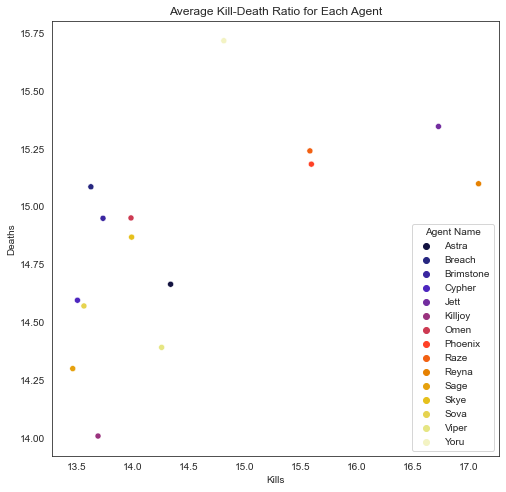

In [55]:
figure, axis = plt.subplots(figsize=(8, 8));
plt.title("Average Kill-Death Ratio for Each Agent")
sns.set_style('white')
sns.scatterplot(x=agents.groupby("Agent Name")["Kills"].mean(), y=agents.groupby("Agent Name")["Deaths"].mean(), hue=agents.groupby("Agent Name")["Agent Name"].first(), palette='CMRmap');

6. Which weapon has the most kills per match on average?

In [45]:
weapons.groupby("Weapon Name")["Kills Per Match"].mean().sort_values(ascending=False)

Weapon Name
Vandal      10.391262
Phantom      6.396117
Operator     3.223529
Spectre      3.191262
Odin         2.507368
Ghost        2.225243
Ares         1.792000
Judge        1.666337
Sheriff      1.609709
Guardian     1.543000
Classic      1.494175
Bulldog      1.333010
Frenzy       1.288119
Marshal      1.134653
Stinger      0.915000
Bucky        0.786170
Shorty       0.670000
Name: Kills Per Match, dtype: float64

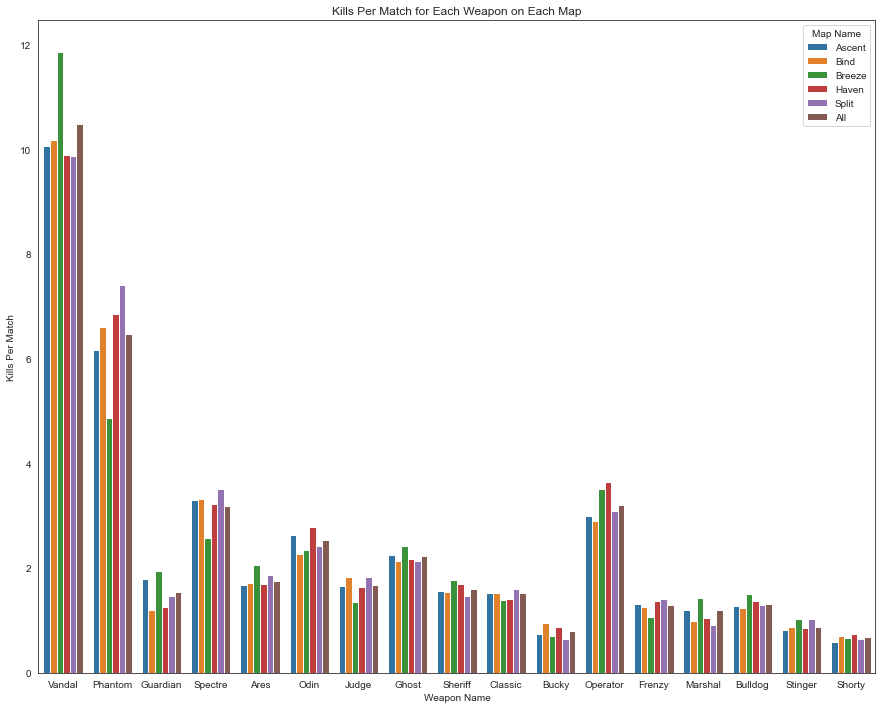

In [46]:
figure, axis = plt.subplots(figsize=(15, 12));
plt.title("Kills Per Match for Each Weapon on Each Map")
sns.set_style('white')
sns.barplot(x="Weapon Name", y="Kills Per Match", hue="Map Name", data=weapons, ci=None);

7. Is there a correlation between kills per match and headshots? What about kills per match and bodyshots? What about kills per match and legshots?

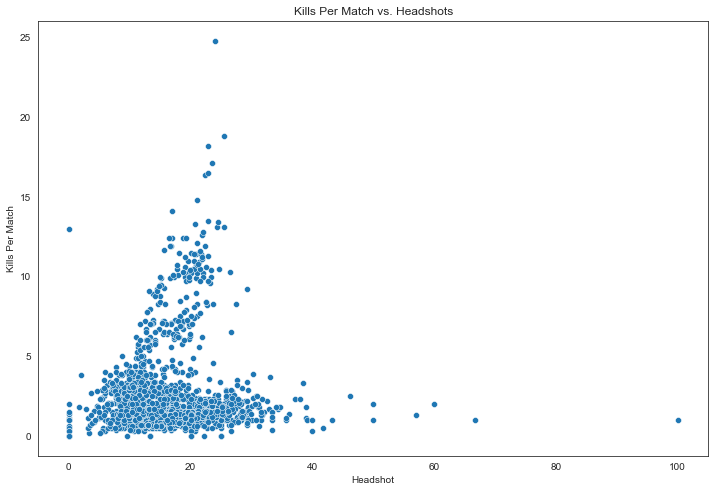

In [47]:
figure, axis = plt.subplots(figsize=(12, 8));
plt.title("Kills Per Match vs. Headshots")
sns.scatterplot(y="Kills Per Match", x="Headshot", data=weapons);

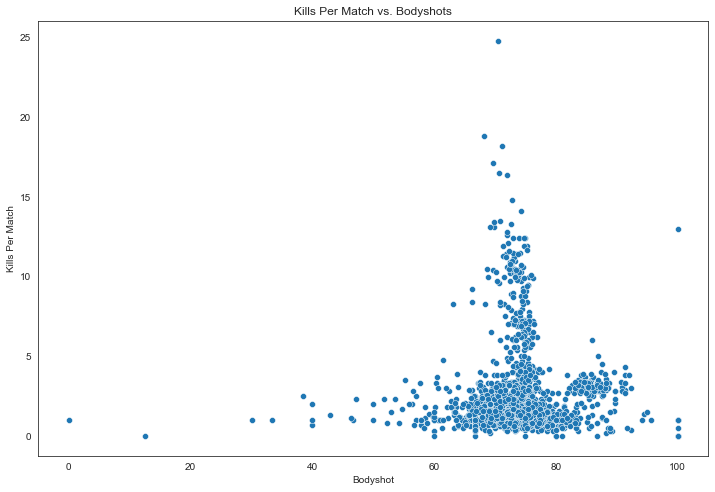

In [48]:
figure, axis = plt.subplots(figsize=(12, 8));
plt.title("Kills Per Match vs. Bodyshots")
sns.scatterplot(y="Kills Per Match", x="Bodyshot", data=weapons);

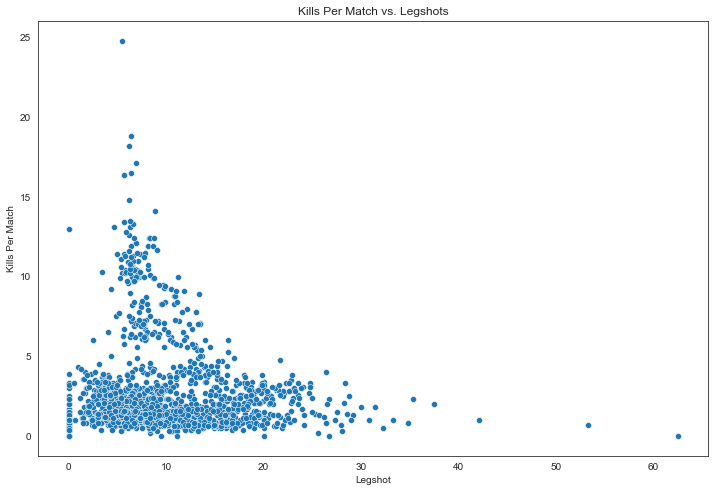

In [49]:
figure, axis = plt.subplots(figsize=(12, 8));
plt.title("Kills Per Match vs. Legshots")
sns.scatterplot(y="Kills Per Match", x="Legshot", data=weapons);

8. Do agent stats change based on the tier?

In [50]:
agents.sort_values("ACS").groupby("tier").tail(1).sort_values("tier")

,Agent Name,KD,Kills,Deaths,Assists,Win Rate,Pick Rate,ACS,First Blood,Num Matches,tier,Map Name
2,Reyna,1.25,18.6,14.8,4.3,41.7,9.6,274,14.3,612.0,3,Ascent
6,Jett,1.49,18.7,12.6,3.7,55.6,8.0,267,12.5,NaN,4,Haven
14,Astra,1.46,25.3,17.3,7.3,33.3,0.6,299,11.8,153.0,5,Bind
9,Phoenix,1.20,18.1,15.1,4.2,41.2,5.3,262,15.9,867.0,6,Split
1,Reyna,1.15,17.7,15.4,4.7,57.4,13.0,256,16.9,5151.0,7,Haven
13,Yoru,1.57,20.7,13.2,4.8,50.0,1.3,319,14.5,510.0,8,Ascent
0,Reyna,1.19,17.8,15.0,4.3,51.8,15.6,256,15.6,9945.0,9,Haven
14,Breach,1.50,24.0,16.0,7.0,50.0,0.3,281,14.6,102.0,10,Breeze
0,Reyna,1.24,18.4,14.8,3.8,53.8,18.2,266,17.4,4743.0,11,Haven
6,Raze,1.27,19.3,15.3,5.2,66.7,6.1,274,16.7,918.0,12,Haven


In [51]:
agents.groupby(['tier','Agent Name'])["ACS"].mean().unstack()

Agent Name,Astra,Breach,Brimstone,Cypher,Jett,Killjoy,Omen,Phoenix,Raze,Reyna,Sage,Skye,Sova,Viper,Yoru
tier,,,,,,,,,,,,,,,
3,252.000000,147.000000,153.000000,211.000000,185.000000,182.000000,151.000000,197.000000,244.000000,274.000000,146.000000,98.000000,194.000000,125.000000,184.000000
4,121.750000,191.666667,175.500000,186.500000,225.333333,189.500000,190.500000,216.500000,199.166667,223.333333,158.500000,194.400000,171.333333,199.333333,174.333333
5,200.500000,186.166667,193.166667,180.166667,227.500000,200.166667,200.666667,208.833333,221.000000,234.666667,176.500000,183.166667,191.500000,184.166667,184.333333
6,184.600000,160.500000,182.666667,179.500000,225.000000,198.666667,183.666667,241.833333,228.500000,233.666667,177.166667,188.833333,199.500000,182.333333,207.333333
7,186.833333,210.500000,196.000000,187.833333,228.333333,203.000000,206.000000,227.500000,233.666667,241.833333,186.666667,191.000000,194.000000,212.166667,213.000000
8,187.333333,200.166667,199.500000,198.500000,238.833333,203.000000,207.833333,225.166667,228.333333,249.333333,193.166667,199.166667,199.333333,196.000000,235.000000
9,209.000000,213.500000,202.333333,189.166667,246.000000,203.500000,207.000000,240.000000,233.500000,251.666667,189.666667,194.333333,202.500000,202.333333,206.333333
10,209.500000,217.833333,218.833333,198.166667,247.500000,206.666667,198.833333,237.500000,239.333333,255.500000,194.500000,209.500000,202.833333,209.333333,199.000000
11,201.333333,196.666667,204.833333,198.833333,254.833333,203.166667,201.666667,234.166667,237.000000,261.000000,195.666667,206.166667,204.666667,214.666667,225.000000


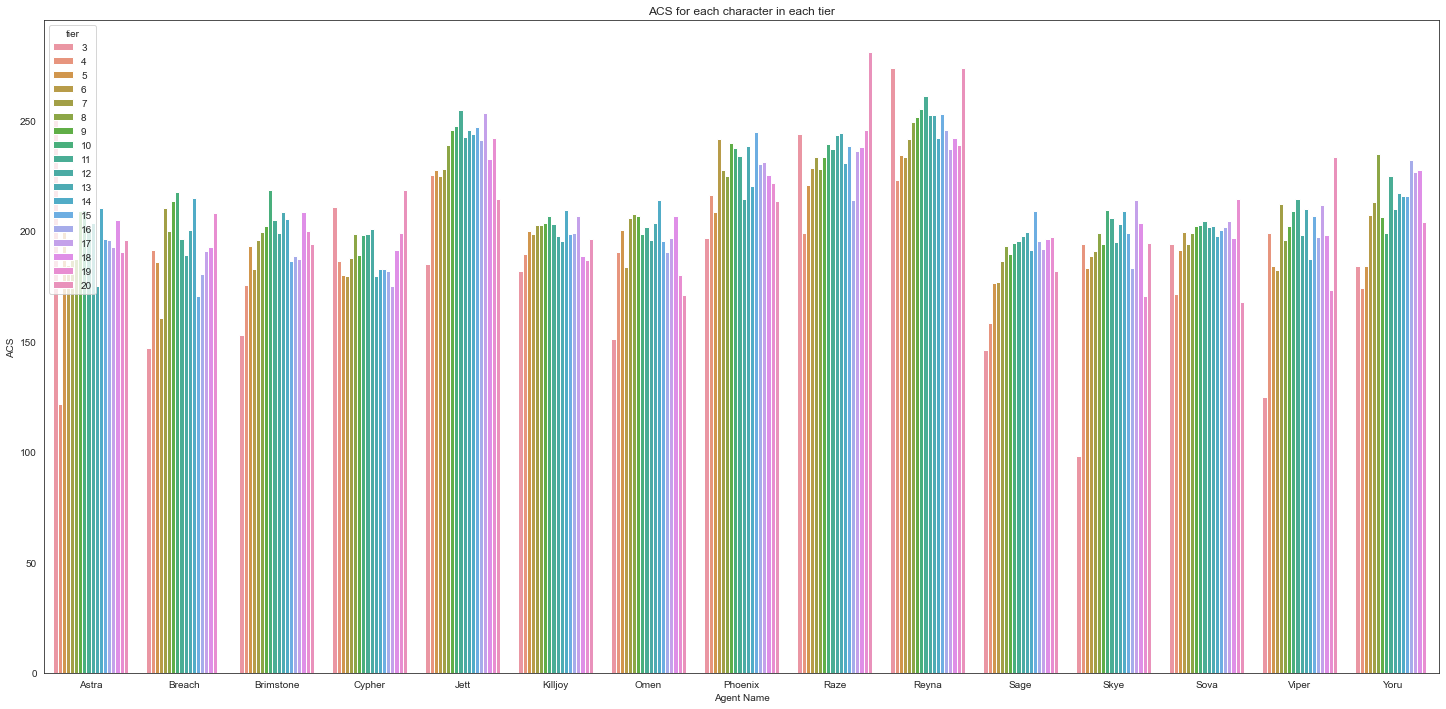

In [52]:
figure, axis = plt.subplots(figsize=(25, 12));
sns.barplot(x=agents.groupby(['tier','Agent Name'])["Agent Name"].first() , y=agents.groupby(['tier','Agent Name'])["ACS"].mean(), hue=agents.groupby(['tier','Agent Name'])["tier"].first() );
plt.title("ACS for each character in each tier");